# Time Series with Pandas Exercises - Solutions

In [1]:
# Import the necessary packages and data
import numpy as np
import pandas as pd
%matplotlib inline

url = 'https://raw.githubusercontent.com/PippleNL/DSMediorSligro/main/data/monthly_milk_production.csv'
df = pd.read_csv(url)

df.head()

,Date,Production
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727


### 1. What is the current data type of the Date column?

In [2]:
df.dtypes

Date          object
Production     int64
dtype: object

#### Answer: object

### 2. Change the Date column to a datetime format

In [3]:
df['Date'] = pd.to_datetime(df['Date'])

#Proof
df.dtypes

Date          datetime64[ns]
Production             int64
dtype: object

### 3. Set the Date column to be the new index of the DataFrame

In [4]:
df.set_index('Date', inplace=True)

#Proof
df.head()

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


### 4. Plot the DataFrame with a line plot. What do you see?

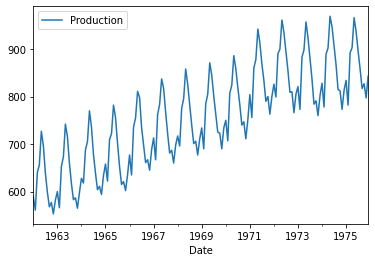

In [5]:
df.plot();

#### Answer: the plot shows seasonality and an upward trend

### 5. Add a column called 'Month_number' that takes the month value from the index, indicated as a number

In [6]:
df['Month_number']=df.index.month

#Proof
df.head()

,Production,Month_number
Date,,
1962-01-01,589,1
1962-02-01,561,2
1962-03-01,640,3
1962-04-01,656,4
1962-05-01,727,5


### 6. Add a column called 'Month_name' that takes the name of the month from the index

In [7]:
df['Month_name']=df.index.strftime('%B')

#Proof
df.head()

,Production,Month_number,Month_name
Date,,,
1962-01-01,589,1,January
1962-02-01,561,2,February
1962-03-01,640,3,March
1962-04-01,656,4,April
1962-05-01,727,5,May


## For simplicity, we'll now delete the two month columns again, as we don't need them anymore.

In [8]:
df = df.drop(['Month_number', 'Month_name'], axis=1)

### 7. What was the production value in March 1970?

In [9]:
df.loc['1970-03-01']

Production    807
Name: 1970-03-01 00:00:00, dtype: int64

### 8. What was the percent increase in production from Sept 1963 to Sept 1973?

In [10]:
100 * (df.loc['1973-09-01'] - df.loc['1963-09-01']) / df.loc['1963-09-01']

Production    34.476844
dtype: float64

### 9. What was the month with the most production after 1967?

In [11]:
df.loc['1967-01-01':].idxmax()

Production   1974-05-01
dtype: datetime64[ns]

### 10. Which 3 months have the lowest production value?

In [12]:
df.sort_values(by='Production',ascending=True).head(3)

,Production
Date,
1962-11-01,553
1962-02-01,561
1963-11-01,565


### 11. Give the average production value per year

In [13]:
df.resample('Y').mean()

,Production
Date,
1962-12-31,615.750000
1963-12-31,630.000000
1964-12-31,658.750000
1965-12-31,673.083333
1966-12-31,708.750000
1967-12-31,732.916667
1968-12-31,748.833333
1969-12-31,763.916667
1970-12-31,782.000000


### 12. Give the total production value per year

In [14]:
df.resample('Y').sum()

,Production
Date,
1962-12-31,7389
1963-12-31,7560
1964-12-31,7905
1965-12-31,8077
1966-12-31,8505
1967-12-31,8795
1968-12-31,8986
1969-12-31,9167
1970-12-31,9384


### 13. Plot out the yearly rolling mean on top of the original data

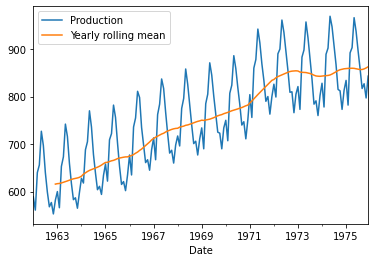

In [15]:
df['Yearly rolling mean'] = df['Production'].rolling(window=12).mean()
df[['Production','Yearly rolling mean']].plot();